# Material structure to intrinsic properties lookup

Instead of using a particular spin dynamics software and querying the input files, we start from the material structure and extract the intrinsic properties as a function of temperature.

In [1]:
from mammos_spindynamics.db import find_materials, get_spontaneous_magnetisation

## How to search for a material?
We can use the function `find_material` to list all materials satisfying certain filters. When used without filters, it will return all available materials in the database.

In [2]:
find_materials()

,chemical_formula,space_group_name,space_group_number,cell_length_a,cell_length_b,cell_length_c,cell_angle_alpha,cell_angle_beta,cell_angle_gamma,cell_volume,ICSD_label,OQMD_label,label
0,Co2Fe2H4,P6_3/mmc,194,2.645345 Angstrom,2.645314 Angstrom,8.539476 Angstrom,90.0 deg,90.0 deg,120.0 deg,51.751119 Angstrom3,,,0001
1,Y2Ti4Fe18,P4/mbm,127,8.186244 Angstrom,8.186244 Angstrom,4.892896 Angstrom,90.0 deg,90.0 deg,90.0 deg,327.8954234 Angstrom3,,,0002
2,Nd2Fe14B,P42/mnm,136,8.78 Angstrom,8.78 Angstrom,12.12 Angstrom,90.0 deg,90.0 deg,90.0 deg,933.42 Angstrom,,,0003


In [3]:
find_materials(chemical_formula="Nd2Fe14B")

,chemical_formula,space_group_name,space_group_number,cell_length_a,cell_length_b,cell_length_c,cell_angle_alpha,cell_angle_beta,cell_angle_gamma,cell_volume,ICSD_label,OQMD_label,label
2,Nd2Fe14B,P42/mnm,136,8.78 Angstrom,8.78 Angstrom,12.12 Angstrom,90.0 deg,90.0 deg,90.0 deg,933.42 Angstrom,,,0003


## Get spontaneous magnetisation data

We use a `short_label` containing the chemical formula and the space group number to extract the spontaneous magnetisation data from the database.

In [4]:
magnetisation_data = get_spontaneous_magnetisation(short_label="Nd2Fe14B-136")

Found material in database.

Chemical Formula: Nd2Fe14B
Space group name: P42/mnm
Space group number: 136
Cell length a: 8.78 Angstrom
Cell length b: 8.78 Angstrom
Cell length c: 12.12 Angstrom
Cell angle alpha: 90.0 deg
Cell angle beta: 90.0 deg
Cell angle gamma: 90.0 deg
Cell volume: 933.42 Angstrom
ICSD_label: 
OQMD_label:

## Lookup using UppASD calculation files
Database entries can be also searched using UppASD input files (`jfile`, `momfile`, `posfile`).

In [5]:
_ = get_spontaneous_magnetisation(
    jfile="known_material/jfile",
    momfile="known_material/momfile",
    posfile="known_material/posfile",
)

Found material in database.

Chemical Formula: Co2Fe2H4
Space group name: P6_3/mmc
Space group number: 194
Cell length a: 2.645345 Angstrom
Cell length b: 2.645314 Angstrom
Cell length c: 8.539476 Angstrom
Cell angle alpha: 90.0 deg
Cell angle beta: 90.0 deg
Cell angle gamma: 120.0 deg
Cell volume: 51.751119 Angstrom3
ICSD_label: 
OQMD_label:

## `MagnetisationData` objects

In [6]:
type(magnetisation_data)

mammos_spindynamics.db.MagnetisationData

The object `magnetisation_data` contains the dataframe of observation and a dictionary connecting each name with a `mammos_entity.Entity` object.

In [7]:
magnetisation_data.dataframe

,T[K],M[A/m]
0,0.000000,1.460000e+06
1,31.578947,1.456985e+06
2,63.157895,1.449450e+06
3,94.736842,1.437973e+06
4,126.315789,1.422737e+06
5,157.894737,1.403779e+06
6,189.473684,1.381044e+06
7,221.052632,1.354392e+06
8,252.631579,1.323601e+06
9,284.210526,1.288354e+06


In [8]:
magnetisation_data.entity_map["T"], magnetisation_data.entity_map["Ms"]

(ThermodynamicTemperature(value=[  0.          31.57894737  63.15789474  94.73684211 126.31578947
  157.89473684 189.47368421 221.05263158 252.63157895 284.21052632
  315.78947368 347.36842105 378.94736842 410.52631579 442.10526316
  473.68421053 505.26315789 536.84210526 568.42105263 600.        ], unit=K),
 SpontaneousMagnetization(value=[1460000.         1456985.36046193 1449449.93657199 1437972.77253639
  1422736.58364638 1403779.39648225 1381044.11152378 1354391.97626968
  1323600.99407897 1288353.67899904 1248213.31769096 1202584.11677895
  1150645.20320241 1091237.80552561 1022660.54963577  942263.95974459
   845538.33920183  723617.755767    553555.21471405  171781.14820705], unit=A / m))

## Plotting magnetisation data

We can use the `panda`'s plotting to plot the dataframe.

<Axes: xlabel='T[K]'>

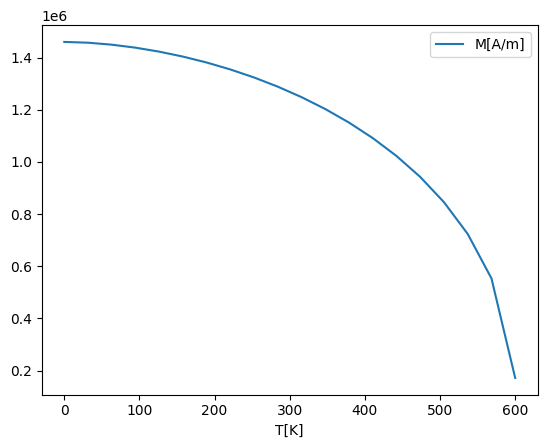

In [9]:
magnetisation_data.dataframe.plot(x="T[K]", y="M[A/m]")

Alternative, we can use `matplotlib` to plot the entities like `numpy.ndarray` objects.

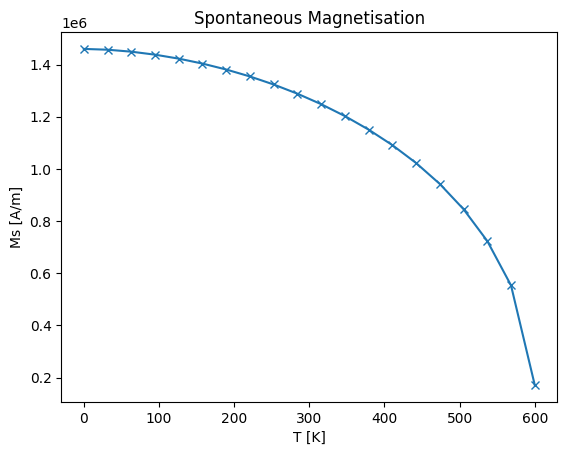

In [10]:
import matplotlib.pyplot as plt

T = magnetisation_data.entity_map["T"]
Ms = magnetisation_data.entity_map["Ms"]

plt.plot(T, Ms, "x-")
plt.title("Spontaneous Magnetisation")
plt.xlabel("T [K]")
plt.ylabel("Ms [A/m]")
plt.show()